# Módulo 1 Utilización, procesamiento y visualización de grandes volúmenes de datos

Diego Perdomo Salcedo A01709150

## Proyecto

Este entregable tiene como proposito que aprendamos a trabajar y procesar con grandes volumenes de datos y generar tableros utiles y correctos que nos apoyen a tomar mejores decisiones.

Se realizara un modelo inteligente utilizando MLlib. Pero antes tenemos que escoger un dataset y configurar PySpark.



## DATASET

Este dataset contiene los reviews de varios productos de Stanford Network Analysis Project (SNAP). Los reviews estan clasificados entre positivos y negativos, dependiendo de la cantidad de estrellas otorgadas al review del producto.

- 1-2: Negativo
- 3: Ignorados
- 4-5: Positivos

Referencia:

https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews/data?select=train.csv

##¿Por qué es Big Data?

### Volumen

- 2GB de datos de reviews es considerable, especialmente porque:
- Son datos no estructurados (texto)
- Requieren preprocesamiento significativo
- El procesamiento de lenguaje natural consume muchos recursos
- Al vectorizar el texto, la dimensionalidad aumenta significativamente

###Variedad

El dataset contiene diferentes tipos de datos:

- Texto (reviews)
- Números (ratings)
- Categorías (clasificaciones)
- Cada review puede tener longitud variable
- El lenguaje natural añade complejidad por su naturaleza no estructurada

###Velocidad

- En un entorno real, Amazon recibe miles de reviews por minuto

### ES BIG DATA

Considerando todos los atributos mencionados anterior, este proyecto pudiera llegar a considerarse big data






### Configuración de Spark:

Lo primero que tenemos que hacer es configurar PySpark. Esta es una herramienta utilizada para el procesamiento de grandes volumenes de datos. Con esto podre facilmente extraer, transformar y cargar los datos para poder limpiarlos adecuadamente para mejorar el alcance de mi modelo.

In [ ]:
#Bibliotecas para poder trabajar con Spark
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar xf spark-3.4.1-bin-hadoop3.tgz
#Configuración de Spark con Python
!pip install -q findspark
!pip install pyspark

#Estableciendo variable de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

#Buscando e inicializando la instalación de Spark
import findspark
findspark.init()
findspark.find()

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,397 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,163 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Pac

'/content/spark-3.4.1-bin-hadoop3'

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
!pwd  # show current path

Mounted at /content/gdrive
/content


In [ ]:
%cd "/content/gdrive/MyDrive/Semestre 7/Ismael"
!ls  # show current directory

/content/gdrive/MyDrive/Semestre 7/Ismael
BigData.ipynb			     spark-3.4.1-bin-hadoop3.tgz.1  THEBIGDATAPROJECT.ipynb
GlobalLandTemperaturesByCountry.csv  spark-3.4.1-bin-hadoop3.tgz.2  train.csv
spark-3.4.1-bin-hadoop3		     spark-3.4.1-bin-hadoop3.tgz.3
spark-3.4.1-bin-hadoop3.tgz	     test.csv


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('PyPro').getOrCreate()
spark

### Cargar los archivos

In [ ]:
# Cargar los archivos CSV sin encabezados
train_spark = spark.read.csv('train.csv', header=False, inferSchema=True)
test_spark = spark.read.csv('test.csv', header=False, inferSchema=True)

# Renombrar las columnas
train_spark = train_spark.withColumnRenamed("_c0", "polarity") \
                         .withColumnRenamed("_c1", "title") \
                         .withColumnRenamed("_c2", "review")

test_spark = test_spark.withColumnRenamed("_c0", "polarity") \
                       .withColumnRenamed("_c1", "title") \
                       .withColumnRenamed("_c2", "review")

# Mostrar las primeras filas del conjunto de entrenamiento
train_spark.show(5)


+--------+--------------------+--------------------+
|polarity|               title|              review|
+--------+--------------------+--------------------+
|       2|Stuning even for ...|This sound track ...|
|       2|The best soundtra...|I'm reading a lot...|
|       2|            Amazing!|"This soundtrack ...|
|       2|Excellent Soundtrack|I truly like this...|
|       2|Remember, Pull Yo...|If you've played ...|
+--------+--------------------+--------------------+
only showing top 5 rows



Podemos observar que el dataset consiste de el titulo y la reseña, esto junto con su clasificación determinando si es positivo o negativo.

In [ ]:
train_spark.printSchema()

root
 |-- polarity: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- review: string (nullable = true)



### Graficas de barra

En estas graficas vemos la cantidad de datos que contiene el dataset y la separación de ambas clases, estas siendo reviews positivos y negativos entre train y test.

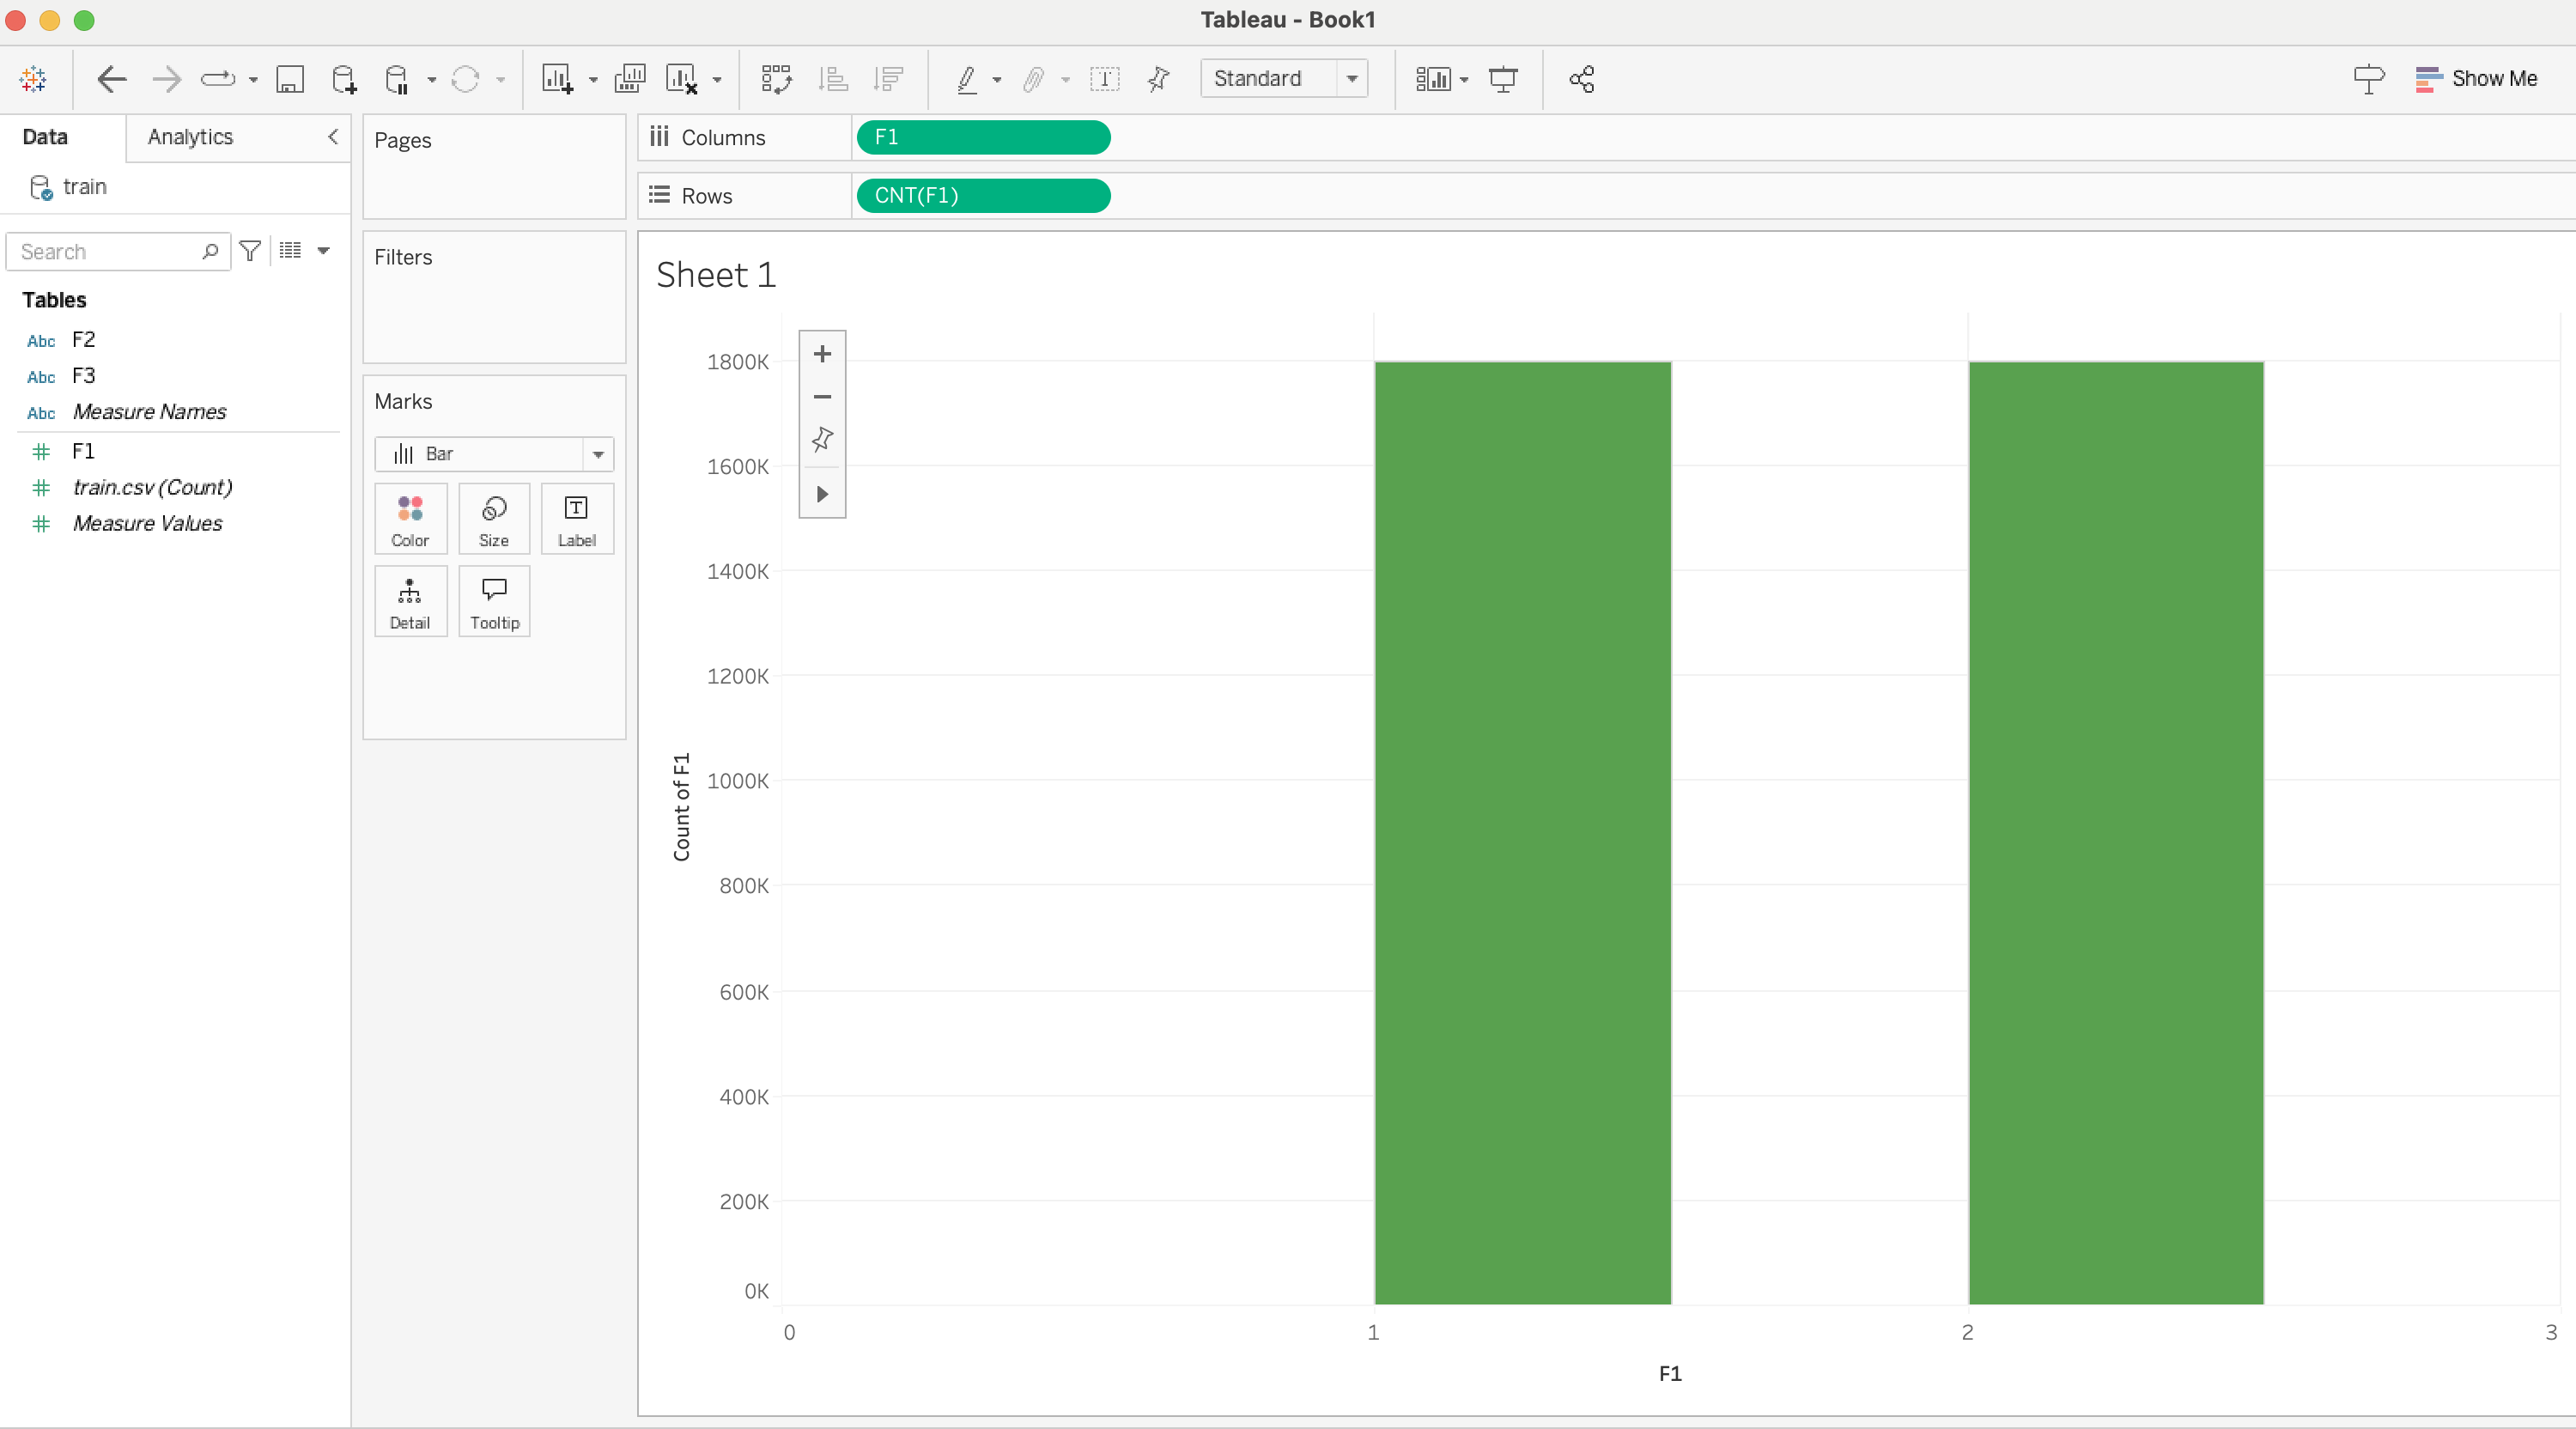

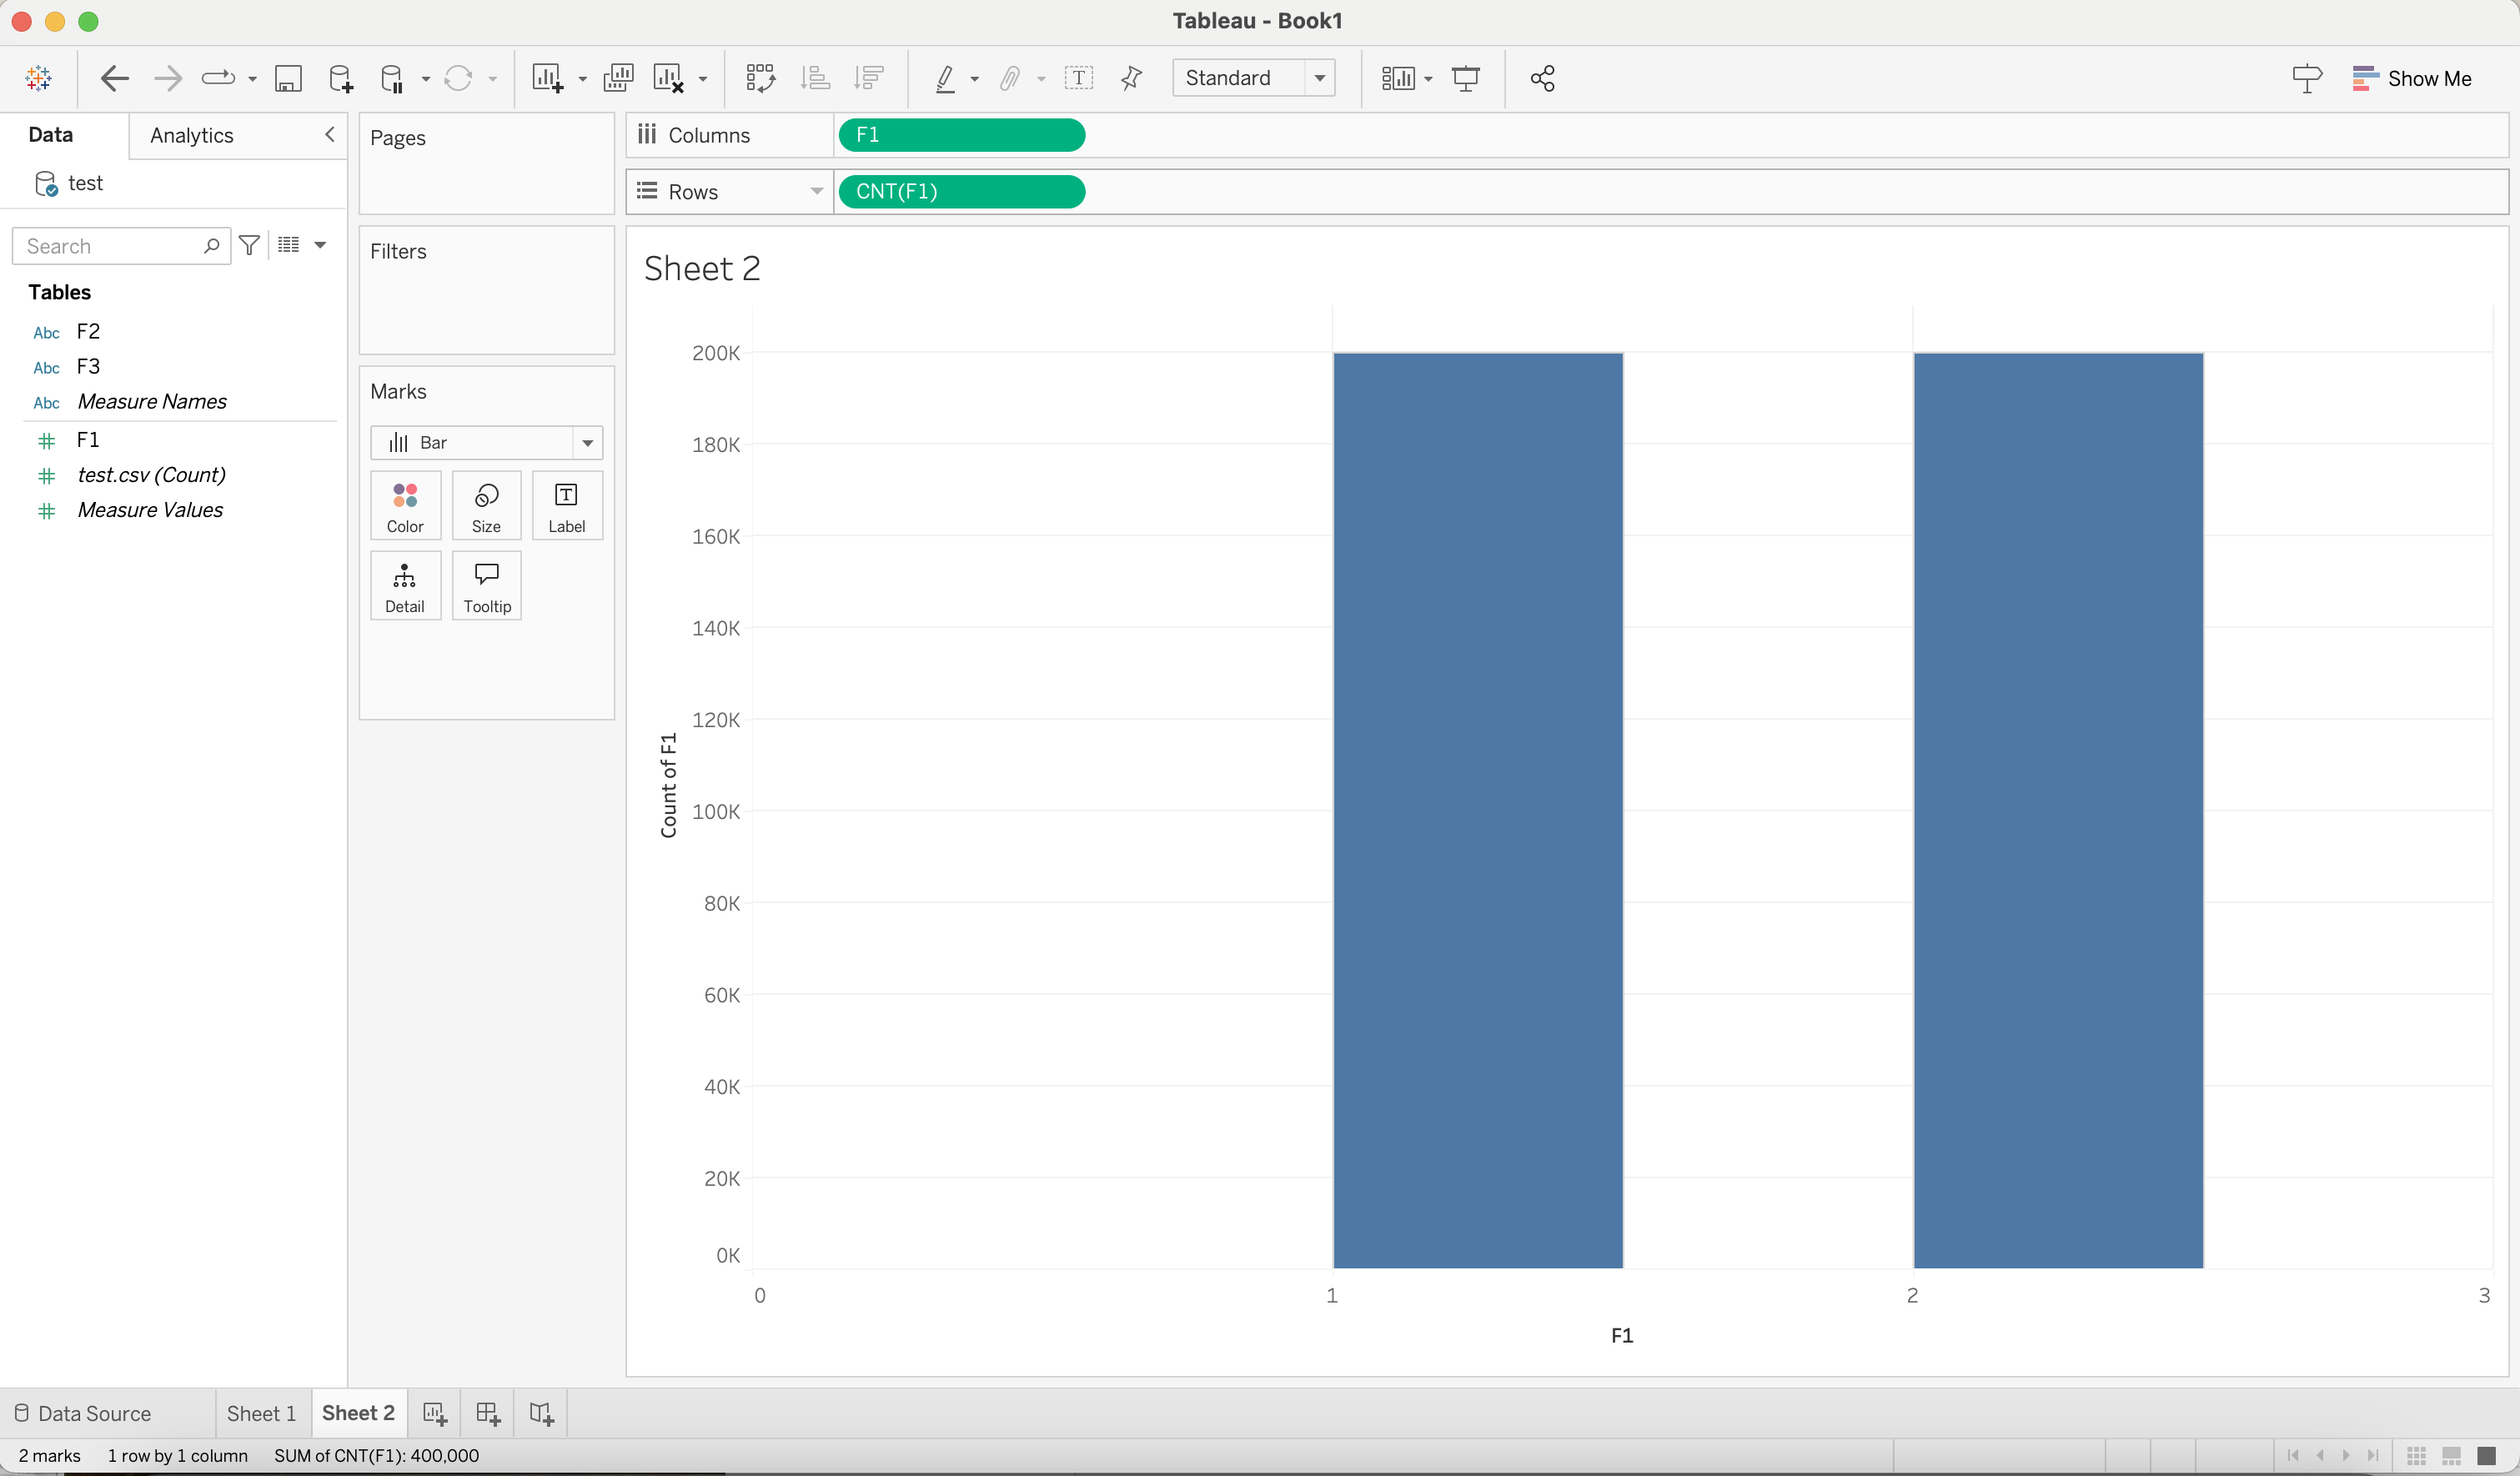

Con estos graficos podemos ver que el dataset esta dividido correctamente entre train y test lo cual me permite tomar la decisión de continuar con el proyecto sin tener que preocuparme sobre eso ya que esta dividido de forma adecuada.

Para que sea mas simple de trabajar con las dos clases agrega una nueva columna llamada label y cambio los valores a 0 y 1 en lugar de 1 y 2 como lo tenia la columna de polarity. Esto con el proposito de que sea mas claro y menos confuso.

In [ ]:
from pyspark.sql.functions import when

# Map the 'polarity' column to a new 'label' column
train_spark = train_spark.withColumn('label', when(train_spark.polarity == 1, 0)
                                                .otherwise(1))

# Mostrar algunas filas aleatorias para verificar el resultado
train_spark.sample(fraction=0.01).show(5)


+--------+--------------------+--------------------+-----+
|polarity|               title|              review|label|
+--------+--------------------+--------------------+-----+
|       2|     Homer or Moses?|An extremely help...|    1|
|       1|  Very disappointed!|This perfume is j...|    0|
|       2|            textbook|Book shipped quic...|    1|
|       1|Just Plain Cruel ...|I must say I was ...|    0|
|       2|Great product; gr...|I got this item w...|    1|
+--------+--------------------+--------------------+-----+
only showing top 5 rows



In [ ]:
train_spark.show()

+--------+--------------------+--------------------+-----+
|polarity|               title|              review|label|
+--------+--------------------+--------------------+-----+
|       2|Stuning even for ...|This sound track ...|    1|
|       2|The best soundtra...|I'm reading a lot...|    1|
|       2|            Amazing!|"This soundtrack ...|    1|
|       2|Excellent Soundtrack|I truly like this...|    1|
|       2|Remember, Pull Yo...|If you've played ...|    1|
|       2|an absolute maste...|I am quite sure a...|    1|
|       1|        Buyer beware|"This is a self-p...|    0|
|       2|      Glorious story|I loved Whisper o...|    1|
|       2|    A FIVE STAR BOOK|I just finished r...|    1|
|       2|Whispers of the W...|This was a easy t...|    1|
|       1|          The Worst!|A complete waste ...|    0|
|       2|          Great book|This was a great ...|    1|
|       2|          Great Read|I thought this bo...|    1|
|       1|           Oh please|I guess you have ...|    

Aqui lo que hacemos es juntar el titulo y los reviews en una misma columna. Esto nos sirve ya que el titulo igualmente puede contener información valioso para identificar si es positivo o negativo. Entonces a la hora de predecir podemos simplemente utilizar el full_review volviendolo un poco mas simple y facil de manejar el problema.

In [ ]:
from pyspark.sql.functions import concat, lit, col
# Create the 'full_review' column by concatenating 'title' and 'review'
train_spark = train_spark.withColumn(
    "full_review",
    concat(col("title").cast("string"), lit(" "), col("review").cast("string"))
)

# Show the first few rows to verify the result
train_spark.show(5)

+--------+--------------------+--------------------+-----+--------------------+
|polarity|               title|              review|label|         full_review|
+--------+--------------------+--------------------+-----+--------------------+
|       2|Stuning even for ...|This sound track ...|    1|Stuning even for ...|
|       2|The best soundtra...|I'm reading a lot...|    1|The best soundtra...|
|       2|            Amazing!|"This soundtrack ...|    1|Amazing! "This so...|
|       2|Excellent Soundtrack|I truly like this...|    1|Excellent Soundtr...|
|       2|Remember, Pull Yo...|If you've played ...|    1|Remember, Pull Yo...|
+--------+--------------------+--------------------+-----+--------------------+
only showing top 5 rows



#### Histograma



En esta grafica se puede ver un histograma con la longitud de los reviews. Esto nos ayuda a ver que la mayoria de los reviews tienen entre 100 y 199 caracteres de largo.

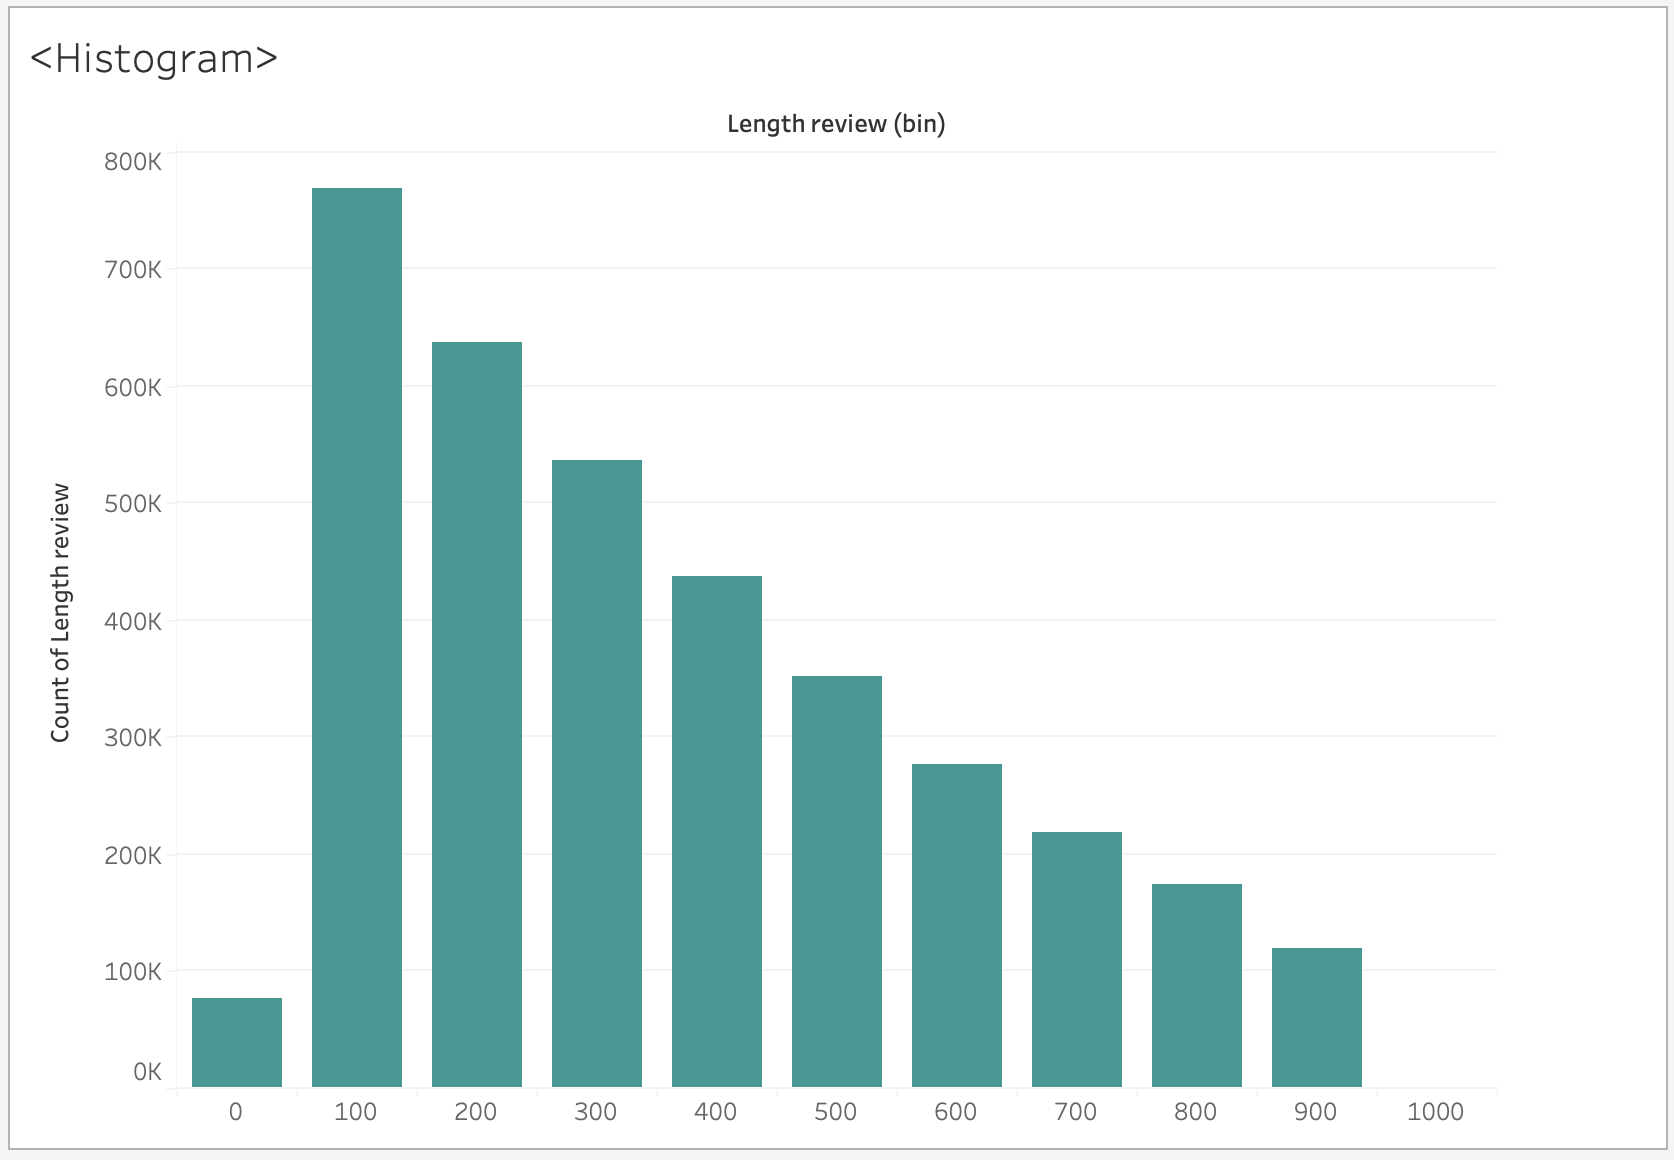

Considerando la longitud de los reviews que podemos observar en el histograma. Es bueno asegurar que los reviews no tengan información demas que no nos sirva. Por eso es bueno realizar una limpieza de los datos teniendo este grafico en mente.

### Limpieza

In [ ]:
# Sample 10,000 rows from the DataFrame
df_train_sample = train_spark.sample(withReplacement=False, fraction=10000 / train_spark.count(), seed=42)

# Show the sampled DataFrame
df_train_sample.show(5)


+--------+--------------------+--------------------+-----+--------------------+
|polarity|               title|              review|label|         full_review|
+--------+--------------------+--------------------+-----+--------------------+
|       1|More than Thomas,...|I bought this thi...|    0|More than Thomas,...|
|       2|    Enjoyable memoir|"I just got this ...|    1|Enjoyable memoir ...|
|       2|Beautiful little ...|"I am very picky ...|    1|Beautiful little ...|
|       1|Poor quality of w...|"I received my ""...|    0|Poor quality of w...|
|       2|"""When you belie...|This song, sung b...|    1|"""When you belie...|
+--------+--------------------+--------------------+-----+--------------------+
only showing top 5 rows



Revisamos si tienen URLs. Como no nos sirven para saber si un review es bueno o malo seran eliminados.

In [ ]:
from pyspark.sql import functions as F

# Add a column to check for URLs in the 'full_review' column
df_train_sample = df_train_sample.withColumn(
    "has_url",
    F.when(F.col("full_review").rlike(r'http\S+'), True).otherwise(False)
)

# Filter the DataFrame to get rows with URLs
df_with_urls = df_train_sample.filter(F.col("has_url") == True)

# Show the rows with URLs
df_with_urls.show(truncate=False)

+--------+--------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+-------------------------------------------------------------------------------------------------------------------------------------------------------------

Este código realiza una limpieza y preprocesamiento de texto en la columna llamada `full_review`, generando una nueva columna `clean_review` con el texto procesado.

1. **Eliminar URLs**: Se eliminan enlaces usando expresiones regulares.
2. **Reducir caracteres repetidos**: Se limitan repeticiones excesivas de caracteres y palabras consecutivas.
3. **Lematización y filtrado**: Se convierte cada palabra a su forma base y en minúscula, eliminando puntuación, dígitos, palabras demasiado largas y stopwords (excepto "not", "no", "nor").
4. **UDF de Spark**: Se registra y aplica esta función de limpieza (`preprocess_text`) a la columna `full_review` y se guarda el resultado en `clean_review`.

In [ ]:
import re
import spacy
from pyspark.sql import functions as F
from pyspark.sql.types import StringType

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Define the regex patterns
url_pattern = re.compile(r'http\S+|www\S+|https\S+')
repeated_char_pattern = re.compile(r'(.)\1{3,}')
repeated_word_pattern = re.compile(r'\b(\w+)( \1\b)+')

# Define custom stopwords
stopwords_to_keep = {"not", "no", "nor"}
custom_stopwords = nlp.Defaults.stop_words - stopwords_to_keep

# UDF for preprocessing text
def preprocess_text(text):
    if text is None:
        return ""

    # Remove URLs
    text = url_pattern.sub('', text)

    # Remove excessive repeated characters and repeated words
    text = repeated_char_pattern.sub(r'\1', text)
    text = repeated_word_pattern.sub(r'\1', text)

    # Process text with spaCy
    doc = nlp(text)

    # Create cleaned tokens
    tokens = [token.lemma_.lower() for token in doc if not (
        token.is_punct or token.is_digit or len(token.text) > 20 or token.text in custom_stopwords)]

    clean_text = " ".join(tokens)
    return clean_text

# Register the UDF
preprocess_udf = F.udf(preprocess_text, StringType())

# Apply the UDF to the DataFrame
df_train_sample = df_train_sample.withColumn("clean_review", preprocess_udf(F.col("full_review")))

# Show the result
df_train_sample.select("full_review", "clean_review").show(truncate=False)


+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Modelo

Este código implementa un modelo de regresión logística en PySpark para clasificar reseñas de texto. Aquí están los pasos clave:

1. **Tokenización**: Se dividen las reseñas limpias (`clean_review`) en palabras usando `Tokenizer`.
2. **Vectorización**: `HashingTF` convierte las palabras en vectores de características numéricas para cada reseña.
3. **Indexación de etiquetas**: `StringIndexer` convierte las etiquetas (columnas `label`) en índices numéricos necesarios para el modelo.
4. **Pipeline**: Se configura un pipeline con los pasos de tokenización, vectorización y indexación, y se aplica al conjunto de datos `df_train_sample`.
5. **Conversión a RDD**: Los datos transformados se convierten a formato RDD, utilizando `LabeledPoint`, necesario para `MLlib`.
6. **Entrenamiento del modelo**: Se entrena un modelo de regresión logística con el optimizador LBFGS (`LogisticRegressionWithLBFGS`).
7. **Predicciones y precisión**: Se calculan las predicciones sobre los datos de entrenamiento, y se mide la precisión comparando las etiquetas reales y las predichas.
8. **Muestra de predicciones**: Se imprimen algunas predicciones junto a las etiquetas reales para ver el rendimiento del modelo.

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import Tokenizer, HashingTF, StringIndexer
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
from pyspark.mllib.regression import LabeledPoint
from pyspark.sql import SparkSession
import pandas as pd

# Pipeline y transformaciones (código anterior)
tokenizer = Tokenizer(inputCol="clean_review", outputCol="words")
hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=2000)
label_indexer = StringIndexer(inputCol="label", outputCol="indexedLabel")
pipeline = Pipeline(stages=[tokenizer, hashingTF, label_indexer])

# Transformar datos y entrenar modelo
df_train_transformed = pipeline.fit(df_train_sample).transform(df_train_sample)
train_rdd = df_train_transformed.select("indexedLabel", "rawFeatures").rdd.map(
    lambda row: LabeledPoint(row.indexedLabel, row.rawFeatures.toArray())
)
lr_model = LogisticRegressionWithLBFGS.train(train_rdd)

# Obtener predicciones
predictions_rdd = df_train_transformed.rdd.map(
    lambda row: (float(row.indexedLabel), float(lr_model.predict(row.rawFeatures.toArray())))
)

# Convertir RDD a DataFrame
predictions_df = predictions_rdd.toDF(['actual_label', 'predicted_label'])

# Convertir a Pandas DataFrame y guardar como CSV
pandas_df = predictions_df.toPandas()
pandas_df.to_csv('predictions_results.csv', index=False)

# Calcular y mostrar métricas
correct_predictions = predictions_rdd.filter(lambda x: x[0] == x[1]).count()
total_predictions = predictions_rdd.count()
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Total predictions: {total_predictions}")
print(f"Correct predictions: {correct_predictions}")
print("\nResultados guardados en 'predictions_results.csv'")

Accuracy: 89.51%
Total predictions: 10134
Correct predictions: 9071

Resultados guardados en 'predictions_results.csv'


## Resultados:

Podemos observar que el modelo alcanzo casi un 90% de precisión. Esto quiere decir que fue capaz de predecir adecuadament si un review de amazon fue positivo o negativo. Esto lo podemos visualizar de la siguiente forma.

### Matriz de Confusión

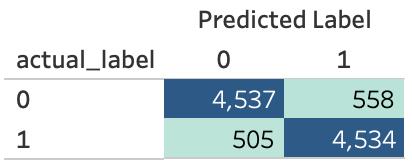

Con esta matriz de confusión podemos notar que el modelo es especialmente efectivo en la identificación correcta tanto de casos positivos como negativos, como lo demuestran los 4,537 verdaderos negativos y 4,534 verdaderos positivos. Los errores del modelo son relativamente bajos y equilibrados, con 558 falsos positivos y 505 falsos negativos, lo que indica que no tiene un sesgo significativo hacia ninguna clase en particular. Este balance en el rendimiento sugiere que el modelo es confiable para su implementación en la clasificación de nuevos casos, manteniendo una tasa de error aceptable del 10.5%.

En resumen, el modelo es capaz de clasificar bastante bien entre las reseñas positivas y negantivas.